In [1]:
import pandas as pd
import yfinance
from pandas_datareader import data
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
import wget

/home/lau/anaconda2/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


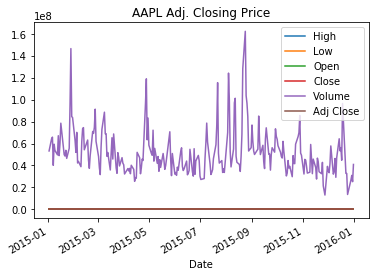

In [2]:
# Only get the adjusted close.
aapl = data.DataReader("AAPL", 
                       start='2015-1-1', 
                       end='2015-12-31', 
                       data_source='yahoo')

aapl.plot(title='AAPL Adj. Closing Price')
plt.show()

In [8]:
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='2N7U5OBZO5MQT4IL',output_format = 'pandas')
# Get json object with the intraday data and another with  the call's metadata
data, meta_data = ts.get_intraday('BA.B',interval = '1min')

ValueError: Invalid API call. Please retry or visit the documentation (https://www.alphavantage.co/documentation/) for TIME_SERIES_INTRADAY.

In [4]:
print(data)

                       1. open    2. high     3. low   4. close  5. volume
date                                                                      
2020-04-01 16:00:00  1101.7100  1103.5000  1101.3800  1101.9000    35594.0
2020-04-01 15:59:00  1101.4500  1102.7200  1101.0200  1101.3101    23256.0
2020-04-01 15:58:00  1101.8700  1102.6094  1099.5900  1101.8600    24263.0
2020-04-01 15:57:00  1105.9200  1106.3000  1099.1300  1101.5900    23477.0
2020-04-01 15:56:00  1104.7600  1106.5000  1104.4900  1106.0601    19867.0
...                        ...        ...        ...        ...        ...
2020-04-01 14:25:00  1105.6899  1105.6899  1104.3500  1104.3500     3257.0
2020-04-01 14:24:00  1106.2500  1106.2500  1106.0000  1106.0200     1882.0
2020-04-01 14:23:00  1108.6000  1108.6000  1108.6000  1108.6000      355.0
2020-04-01 14:22:00  1106.7000  1107.0500  1106.1801  1107.0500     2225.0
2020-04-01 14:21:00  1106.0649  1107.3101  1106.0649  1106.2400     2816.0

[100 rows x 5 columns]


In [5]:
data ,metadata = ts.get_daily_adjusted('GOOGL',outputsize = 'full')

In [6]:
print(data)

            1. open  2. high   3. low  4. close  5. adjusted close  \
date                                                                 
2020-04-01  1124.00  1129.42  1093.49  1102.100          1102.1000   
2020-03-31  1148.73  1173.40  1136.72  1161.950          1161.9500   
2020-03-30  1132.64  1151.00  1098.49  1146.310          1146.3100   
2020-03-27  1127.47  1151.05  1104.00  1110.260          1110.2600   
2020-03-26  1114.72  1171.48  1092.03  1162.920          1162.9200   
...             ...      ...      ...       ...                ...   
2004-08-25   104.76   108.00   103.88   106.000            53.1641   
2004-08-24   111.24   111.60   103.57   104.870            52.5974   
2004-08-23   110.76   113.48   109.05   109.400            54.8694   
2004-08-20   101.01   109.08   100.50   108.310            54.3227   
2004-08-19   100.01   104.06    95.96   100.335            50.3228   

             6. volume  7. dividend amount  8. split coefficient  
date                  

In [7]:
ticker_df = pd.read_csv("../stock_data/tickers.csv")
ticker_df.head()

,ticker,name,is_etf,exchange
0,AABA,Altaba Inc.,NaN,NASDAQ
1,AAL,"American Airlines Group, Inc.",NaN,NASDAQ
2,AAME,Atlantic American Corporation,NaN,NASDAQ
3,AAOI,"Applied Optoelectronics, Inc.",NaN,NASDAQ
4,AAON,"AAON, Inc.",NaN,NASDAQ


In [12]:
import bs4 as bs
import pickle
import requests

def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
        
    with open("sp500tickers.pickle","wb") as f:
        pickle.dump(tickers,f)
        
    return tickers

In [13]:
ticks = save_sp500_tickers()

In [14]:
ticks

['MMM\n',
 'ABT\n',
 'ABBV\n',
 'ABMD\n',
 'ACN\n',
 'ATVI\n',
 'ADBE\n',
 'AMD\n',
 'AAP\n',
 'AES\n',
 'AFL\n',
 'A\n',
 'APD\n',
 'AKAM\n',
 'ALK\n',
 'ALB\n',
 'ARE\n',
 'ALXN\n',
 'ALGN\n',
 'ALLE\n',
 'AGN\n',
 'ADS\n',
 'LNT\n',
 'ALL\n',
 'GOOGL\n',
 'GOOG\n',
 'MO\n',
 'AMZN\n',
 'AMCR\n',
 'AEE\n',
 'AAL\n',
 'AEP\n',
 'AXP\n',
 'AIG\n',
 'AMT\n',
 'AWK\n',
 'AMP\n',
 'ABC\n',
 'AME\n',
 'AMGN\n',
 'APH\n',
 'ADI\n',
 'ANSS\n',
 'ANTM\n',
 'AON\n',
 'AOS\n',
 'APA\n',
 'AIV\n',
 'AAPL\n',
 'AMAT\n',
 'APTV\n',
 'ADM\n',
 'ARNC\n',
 'ANET\n',
 'AJG\n',
 'AIZ\n',
 'ATO\n',
 'T\n',
 'ADSK\n',
 'ADP\n',
 'AZO\n',
 'AVB\n',
 'AVY\n',
 'BKR\n',
 'BLL\n',
 'BAC\n',
 'BK\n',
 'BAX\n',
 'BDX\n',
 'BRK.B\n',
 'BBY\n',
 'BIIB\n',
 'BLK\n',
 'BA\n',
 'BKNG\n',
 'BWA\n',
 'BXP\n',
 'BSX\n',
 'BMY\n',
 'AVGO\n',
 'BR\n',
 'BF.B\n',
 'CHRW\n',
 'COG\n',
 'CDNS\n',
 'CPB\n',
 'COF\n',
 'CPRI\n',
 'CAH\n',
 'KMX\n',
 'CCL\n',
 'CAT\n',
 'CBOE\n',
 'CBRE\n',
 'CDW\n',
 'CE\n',
 'CNC\n',
 'CNP\